In [115]:
#importing the libraries

from tensorflow.keras.layers import Input,Dense,Conv2D,Lambda,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [116]:
#resize all images to this
image_size = [224,224]

train_path = r'/content/drive/My Drive/malariadataset/Train'
valid_path = r'/content/drive/My Drive/malariadataset/Test'

In [117]:
mobilenet = MobileNet(include_top=False, weights='imagenet',input_shape=image_size+[3])

#dont train existing weights
for layer in mobilenet.layers:
  layer.trainable = False

In [118]:
#useful for getting number of output classes
folders = glob('/content/drive/My Drive/malariadataset/Train/*')

In [119]:
folders, len(folders)

(['/content/drive/My Drive/malariadataset/Train/Uninfected',
  '/content/drive/My Drive/malariadataset/Train/Parasite'],
 2)

In [120]:
x = Flatten()(mobilenet.output)

In [129]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [130]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [131]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

In [132]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [133]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [134]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [135]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
13/13 [==============================] - 7s 522ms/step - loss: 6.7369 - accuracy: 0.6683 - val_loss: 0.7081 - val_accuracy: 0.9030
Epoch 2/25
13/13 [==============================] - 7s 508ms/step - loss: 1.4446 - accuracy: 0.8822 - val_loss: 0.7607 - val_accuracy: 0.9478
Epoch 3/25
13/13 [==============================] - 6s 465ms/step - loss: 0.4520 - accuracy: 0.9543 - val_loss: 0.5060 - val_accuracy: 0.9478
Epoch 4/25
13/13 [==============================] - 6s 469ms/step - loss: 0.2796 - accuracy: 0.9639 - val_loss: 0.2584 - val_accuracy: 0.9776
Epoch 5/25
13/13 [==============================] - 6s 466ms/step - loss: 0.1034 - accuracy: 0.9784 - val_loss: 0.4957 - val_accuracy: 0.9701
Epoch 6/25
13/13 [==============================] - 6s 459ms/step - loss: 0.1564 - accuracy: 0.9736 - val_loss: 0.2426 - val_accuracy: 0.9701
Epoch 7/25
13/13 [==============================] - 6s 459ms/step - loss: 0.0955 - accuracy: 0.9856 - val_loss: 0.2046 - val_accuracy: 0.9851
Epoch 

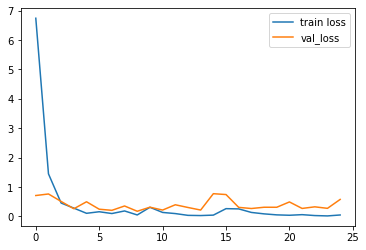

In [136]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

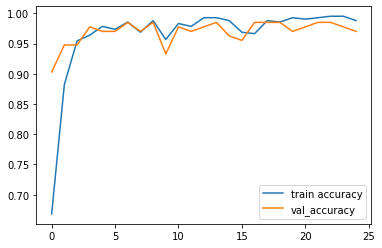

In [137]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [139]:
model.save('malaria_mobilenet.h5')

In [140]:
y_pred = model.predict(test_set)

In [141]:
y_pred

array([[1.00000000e+00, 4.63038870e-33],
       [5.29906035e-16, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [3.19029707e-23, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.43522718e-35],
       [1.00000000e+00, 5.04835548e-11],
       [1.00000000e+00, 1.42598313e-24],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.53817581e-27],
       [1.00000000e+00, 0.00000000e+00],
       [3.03391920e-04, 9.99696612e-01],
       [9.43274081e-01, 5.67259416e-02],
       [1.00000000e+00, 0.00000000e+00],
       [9.95648324e-01, 4.35167085e-03],
       [1.00000000e+00, 2.01737098e-27],
       [1.30027244e-02, 9.86997247e-01],
       [1.00000000e+00, 0.00000000e+00],
       [2.59540594e-15, 1.00000000e+00],
       [3.15142704e-12, 1.00000000e+00],
       [1.00000000e+00, 1.16950562e-24],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00132938e-16],
       [9.99420166e-01, 5.79896092e-04],
       [1.000000

In [142]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0])

##Testing on Images

In [143]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [149]:
model = load_model('malaria_mobilenet.h5')

In [150]:
img = image.load_img(r'/content/drive/My Drive/malariadataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_87.png',target_size=(224,224))

In [151]:
img = image.img_to_array(img)
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [152]:
img = img/255 #as we have rescaled our test set

In [153]:
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
img.shape

(1, 224, 224, 3)

In [154]:
model.predict(img)

array([[0.88796085, 0.1120391 ]], dtype=float32)

In [155]:
a = np.argmax(model.predict(img),axis=1)
if a==0:
  print('Infected')
elif a==1:
  print('Uninfected')

Infected
